## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [2]:
# answer goes here

f_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv')

f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Columns: 217 entries, PUF_ID to finalwt
dtypes: float64(2), int64(215)
memory usage: 10.6 MB


As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [4]:
# answer goes here

X = f_df.filter(like='score', axis=1)

X.head()

,FWBscore,FSscore,LMscore,KHscore
0,55,44,3,1.267
1,51,43,3,-0.570
2,49,42,3,-0.188
3,49,42,2,-1.485
4,49,42,1,-1.900


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [23]:
# answer goes here
scale = StandardScaler()

X_scale = pd.DataFrame(scale.fit_transform(X), columns=X.columns)

Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

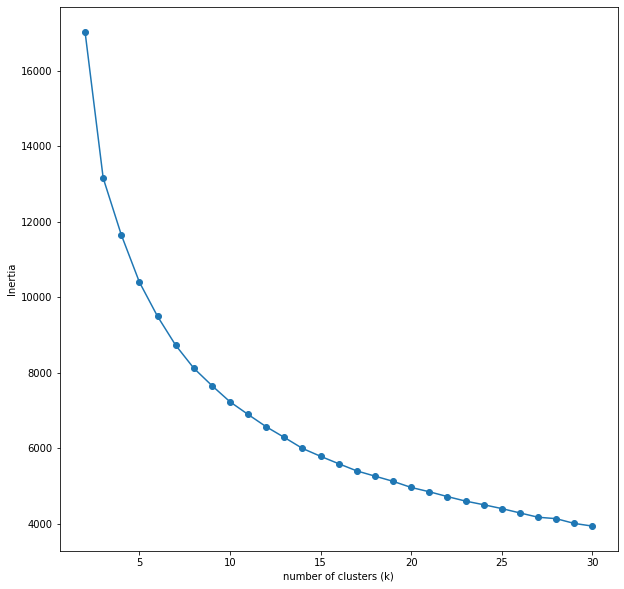

In [24]:
# answer goes here
k_values = list(range(2, 31))
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scale)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 10))
plt.plot(k_values, inertia_values, marker="o")
plt.xlabel("number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

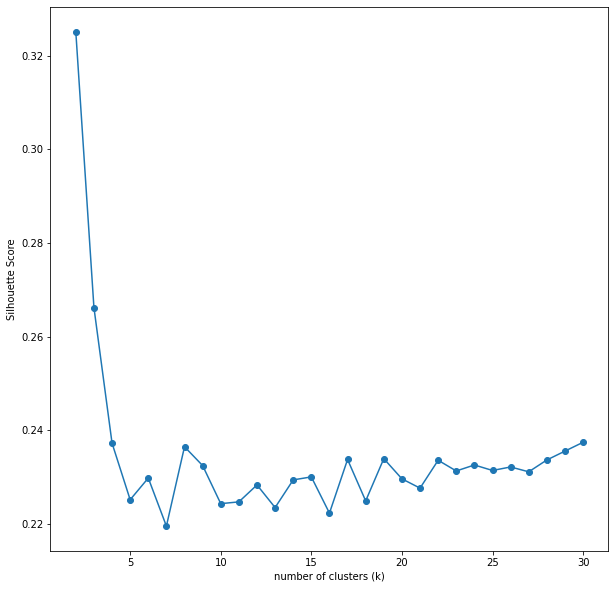

In [25]:
k_values = list(range(2, 31))
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(X_scale)
    silhouette_scores.append(silhouette_score(X_scale, clusters))

plt.figure(figsize=(10, 10))
plt.plot(k_values, silhouette_scores, marker="o")
plt.xlabel("number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()